In [1]:
# Belo Horizonte - Random Forest

import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 6,4
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (6,4)})

import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_excel(r"BeloHorizonte_ML_Std.xls")
df.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_BH
0,2.189400,0.696896,-0.998037,1.168642,1.167386,1
1,2.080311,0.575242,-1.052757,1.306965,1.297908,1
2,2.721430,0.301509,-1.186487,0.909275,1.058800,1
3,1.905134,0.254569,-1.208158,1.094816,1.235846,1
4,2.879854,0.487816,-1.101539,0.829424,0.997040,1


In [3]:
# Predicting Cartel
# define X and y
X = df.drop("Cartel_BH",axis = 1)
y = df.Cartel_BH

In [4]:
# summarize the dataset
print(X.shape, y.shape)

(496, 5) (496,)


In [5]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.24.2


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    193.0  154.0       1.0      347.0         347.0
_______________________________________________
Confusion Matrix: 
 [[193   0]
 [  0 154]]

Test Result:
Accuracy Score: 99.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   1.000000   0.985075  0.993289    0.992537      0.993389
recall      0.987952   1.000000  0.993289    0.993976      0.993289
f1-score    0.993939   0.992481  0.993289    0.993210      0.993293
support    83.000000  66.000000  0.993289  149.000000    149.000000
_______________________________________________
Confusion

In [9]:
#Random Forest hyperparameter tuning - Randomized Search Cross Validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from numpy import arange

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
criterion = ['gini', 'entropy' ]
max_features = ['auto', 'sqrt']
max_depth = [2, 4, 6, 8, 10]
#max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
max_samples = [float(i) for i in arange(0.1, 1.1, 0.1)]

random_grid = {'n_estimators': n_estimators, 'criterion': criterion,'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap, 'max_samples': max_samples}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_samples': 0.8, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True})
Train Result:
Accuracy Score: 99.42%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.994819    0.993506  0.994236    0.994163      0.994236
recall       0.994819    0.993506  0.994236    0.994163      0.994236
f1-score     0.994819    0.993506  0.994236    0.994163      0.994236
support    193.000000  154.000000  0.994236  347.000000    347.000000
_______________________________________________
Confusion Matrix: 
 [[192   1]
 [  1 153]]

Test Result:
Accuracy Score: 98.66%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.987952   0.98

In [10]:
# make class predictions for the testing set
y_pred = rf_clf.predict(X_test)

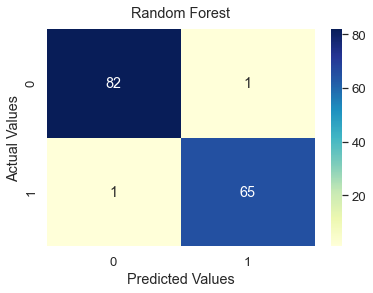

In [37]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.2) # Adjust to fit
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Random Forest', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_RandomForest_BeloHorizonte.png', dpi=600)

In [12]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        83
           1       0.98      0.98      0.98        66

    accuracy                           0.99       149
   macro avg       0.99      0.99      0.99       149
weighted avg       0.99      0.99      0.99       149



In [13]:
# store the predicted probabilities for class 1
from sklearn.metrics import roc_curve
y_pred_proba = rf_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

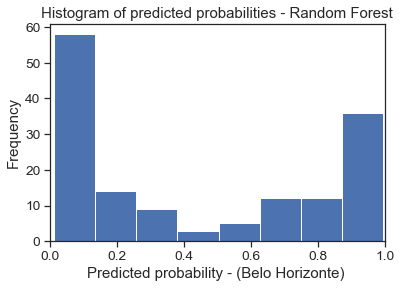

In [32]:
# histogram of predicted probabilities
plt.hist(y_pred_proba, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities - Random Forest')
plt.xlabel('Predicted probability - (Belo Horizonte) ')
plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('Histogram_RandomForest_BeloHorizonte.eps', format='eps')
plt.show()

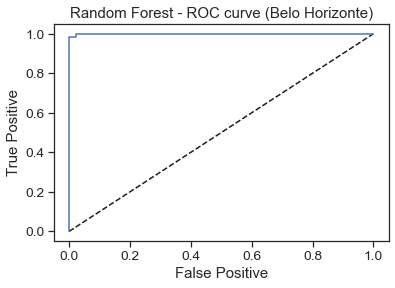

In [33]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Random Forest - ROC curve (Belo Horizonte)')
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_RandomForest_BeloHorizonte.eps', format='eps')
plt.show()

In [16]:
from sklearn.metrics import roc_curve
y_pred_proba = rf_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [17]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9996349032493611

In [18]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
auc = cross_val_score(rf_clf, X_test, y_test, cv=5, scoring='roc_auc').mean()
print('AUC:',auc)

AUC: 0.9935520361990949


In [19]:
import eli5
from eli5.sklearn import PermutationImportance

In [20]:
perm = PermutationImportance(rf_clf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3893 ± 0.0612,Price_sd
0.1141 ± 0.0329,SPD
0.0765 ± 0.0066,CV
0.0537 ± 0.0407,Price_kurtosis
0.0027 ± 0.0066,Price_skewness


In [21]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tpr[thresholds > threshold][-1])
    print('specificity:', 1 - fpr[thresholds > threshold][-1])

In [22]:
evaluate_threshold(0.5)

sensitivity: 0.9848484848484849
specificity: 1.0


In [23]:
evaluate_threshold(0.6)

sensitivity: 0.15151515151515152
specificity: 1.0


In [24]:
evaluate_threshold(0.7)

sensitivity: 0.15151515151515152
specificity: 1.0


In [25]:
evaluate_threshold(0.8)

sensitivity: 0.15151515151515152
specificity: 1.0


In [26]:
evaluate_threshold(0.9)

sensitivity: 0.15151515151515152
specificity: 1.0


In [27]:
evaluate_threshold(0.99)

sensitivity: 0.015151515151515152
specificity: 1.0
